# Rating Prediction
Predicting the ratings of the Restaurant.

In [1]:
# Importing the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,8)

In [3]:
# Reading the data.
df = pd.read_csv('zomato.csv', encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
country_df = pd.read_excel('Country-Code.xlsx')
country_df.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [5]:
# Merging the dataset into single Dataframe.
final_df = pd.merge(df, country_df, how='inner', on='Country Code')
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


# Exploring the dataset.

In [6]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
final_df.shape

(9551, 22)

In [8]:
final_df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [9]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [10]:
# Checking whether the dataset has any null values.
final_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [11]:
# Imputing the null values using mode imputation.
mode = final_df['Cuisines'].mode()[0]

In [12]:
final_df['Cuisines'] = final_df['Cuisines'].fillna(mode)

# Exploratory Data Analysis.

In [13]:
values = final_df['Country'].value_counts().values
labels = final_df['Country'].value_counts().index

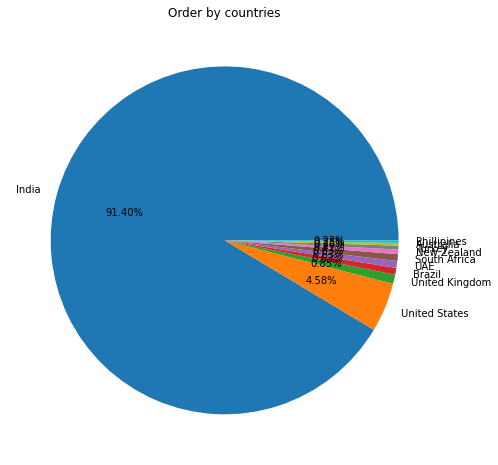

In [14]:
plt.figure(figsize=(12,8))
plt.pie(values[:10], labels=labels[:10], autopct='%1.2f%%')
plt.title('Order by countries')
plt.show()

### Observation : Most number of orders are placed in India.

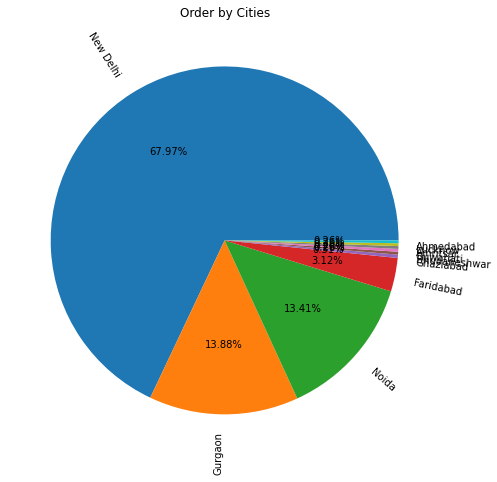

In [15]:
plt.figure(figsize=(12,8))
values = final_df['City'].value_counts().values
labels = final_df['City'].value_counts().index
plt.pie(values[:10], labels=labels[:10], autopct='%1.2f%%', rotatelabels=True)
plt.title('Order by Cities')
plt.show()

### Observation : Most number of orders are placed in New Delhi city in India.

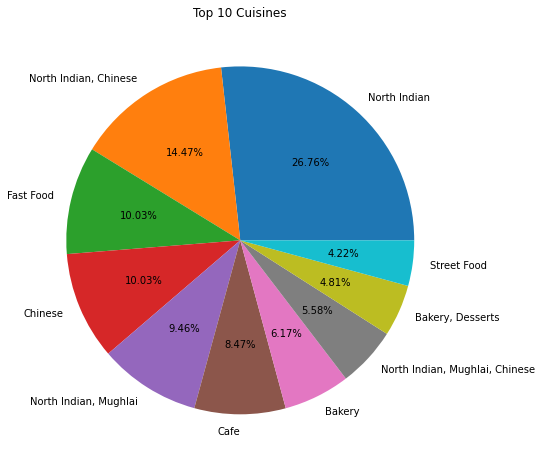

In [16]:
plt.figure(figsize=(12,8))
values = final_df['Cuisines'].value_counts().values
labels = final_df['Cuisines'].value_counts().index
plt.pie(values[:10], labels=labels[:10], autopct='%1.2f%%')
plt.title('Top 10 Cuisines')
plt.show()

### Observation : North Indian and North Indian, Chinese are the most ordered Cuisines.

In [17]:
ratings = final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating count'})
ratings

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


### Observation : Most number of people's are not rated.

Text(0.5, 1.0, 'Aggregate rating by Restaurants')

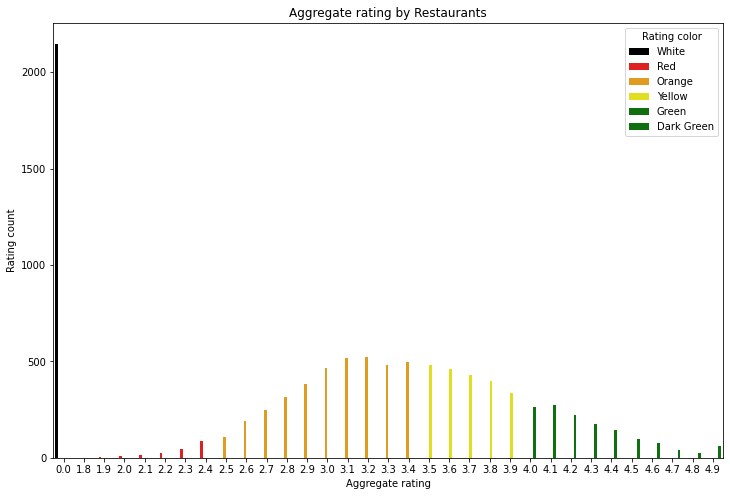

In [18]:
sns.barplot(x='Aggregate rating', y='Rating count', hue='Rating color', data=ratings, palette=['black','red','orange','yellow','green','green'])
plt.title('Aggregate rating by Restaurants')

In [19]:
final_df.groupby(['Aggregate rating','Country']).size().reset_index().head()

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


### Observation : India has the highest number with the zero ratings.

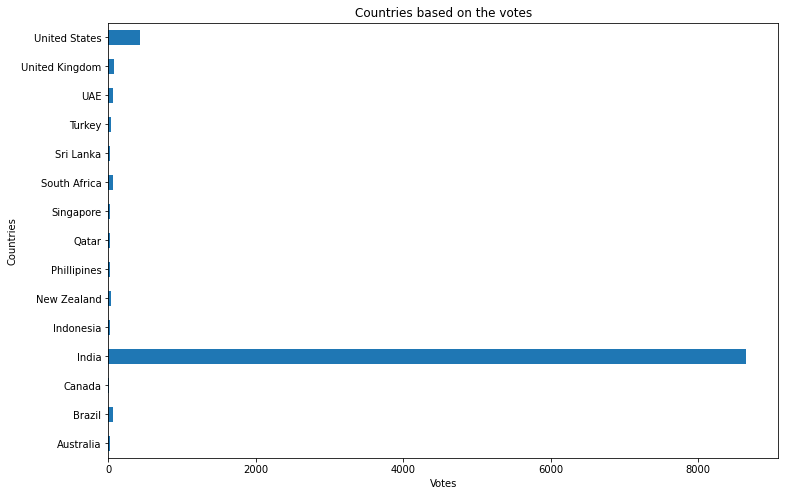

In [20]:
final_df.groupby('Country')['Votes'].count().plot.barh()
plt.title('Countries based on the votes')
plt.xlabel('Votes')
plt.ylabel('Countries')
plt.show()

### Observation : India has the highest numbers of Votes.

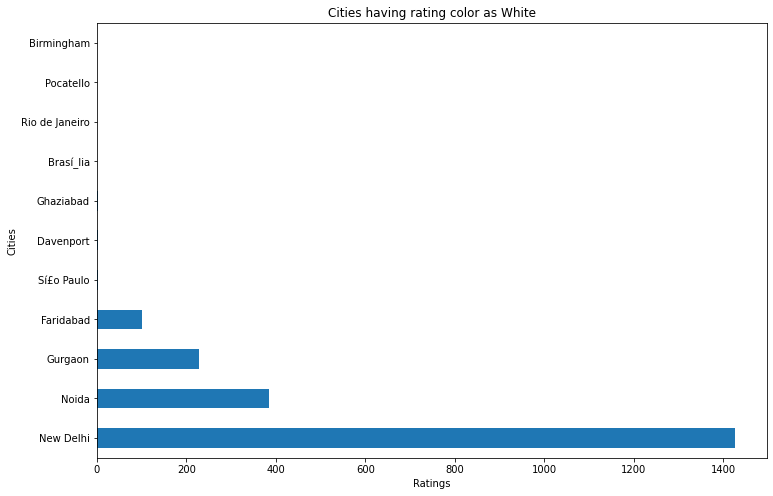

In [21]:
final_df.loc[(final_df['Rating color']=='White'),'City'].value_counts().plot.barh()
plt.title('Cities having rating color as White')
plt.xlabel('Ratings')
plt.ylabel('Cities')
plt.show()

### Observation : New Delhi city has the most number of Zero ratings.

In [22]:
final_df.loc[(final_df['Aggregate rating']>4.5),'Cuisines'].value_counts().head(10)

North Indian                             8
Indian                                   5
Cafe                                     4
Asian                                    4
Sunda, Indonesian                        3
Japanese, Sushi                          3
Seafood                                  3
Desserts                                 3
Mexican, American, Tex-Mex, Burger       3
European, Mediterranean, North Indian    3
Name: Cuisines, dtype: int64

### Observation : North Indian and Indian Cuisines has got the maximum ratings above 4.5

In [23]:
delivery = final_df.groupby(['Is delivering now','Country']).size().reset_index().rename(columns={0:'Counts'})
delivery

,Is delivering now,Country,Counts
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,8618
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


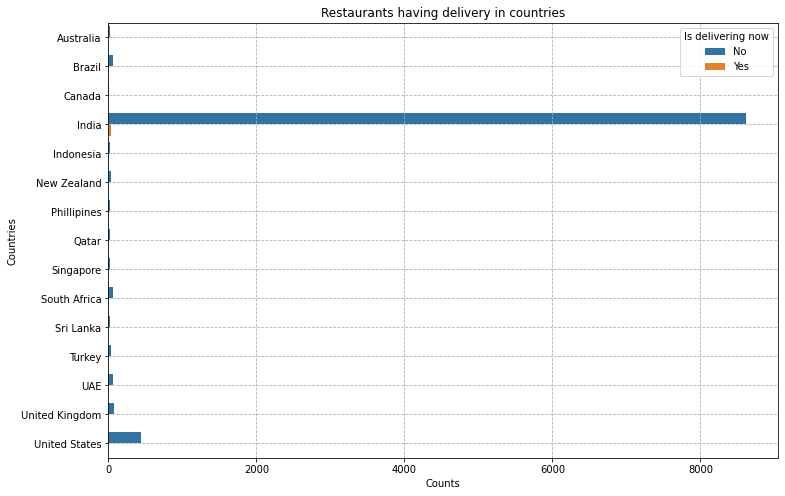

In [24]:
sns.barplot(x='Counts', y='Country', hue='Is delivering now', data=delivery, orient='h')
plt.title('Restaurants having delivery in countries')
plt.xlabel('Counts')
plt.ylabel('Countries')
plt.grid(linestyle='--')
plt.show()

### Observation : Most of the restaurants are not delivering in India.

In [25]:
Cost_for_two = final_df.groupby(['City','Country'])['Average Cost for two'].max().sort_values(ascending=False).head(10).reset_index()
Cost_for_two

,City,Country,Average Cost for two
0,Jakarta,Indonesia,800000
1,Tangerang,Indonesia,300000
2,Bogor,Indonesia,250000
3,Bandung,Indonesia,150000
4,New Delhi,India,8000
5,Pasay City,Phillipines,6000
6,Gurgaon,India,5000
7,Colombo,Sri Lanka,4500
8,Mandaluyong City,Phillipines,4000
9,Agra,India,3600


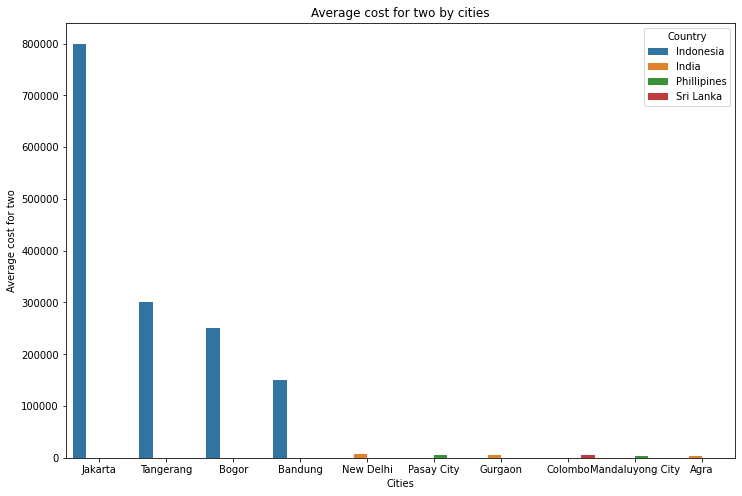

In [26]:
sns.barplot(x='City', y='Average Cost for two', hue='Country', data=Cost_for_two)
plt.title('Average cost for two by cities')
plt.xlabel('Cities')
plt.ylabel('Average cost for two')
plt.show()

### Observation : Average cost for two has maximum price for most of the cities in Indonesia.

In [27]:
online_delivery = final_df.groupby(['Country','Has Online delivery']).size().reset_index().rename(columns={0:'Counts'})
online_delivery

,Country,Has Online delivery,Counts
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


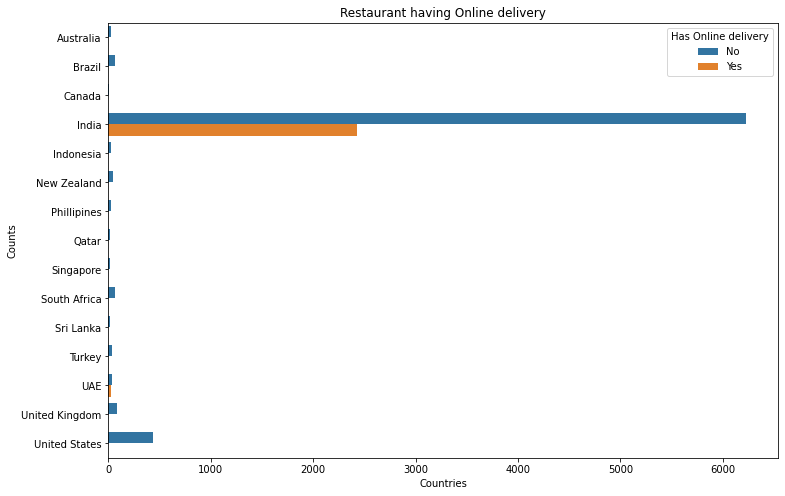

In [28]:
sns.barplot(x='Counts', y='Country', hue='Has Online delivery', data=online_delivery)
plt.title('Restaurant having Online delivery')
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.show()

### Observation : India has highest number of online delivery and which doesnt delivery online.

In [29]:
currency_by_country = final_df.groupby(['Country','Currency']).size().reset_index().rename(columns={0:'Counts'})
currency_by_country

,Country,Currency,Counts
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


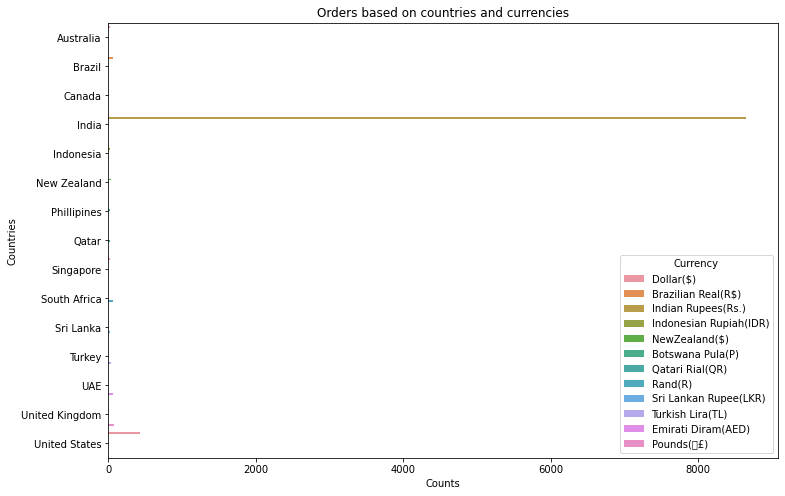

In [30]:
sns.barplot(x='Counts', y='Country', hue='Currency', data=currency_by_country)
plt.title('Orders based on countries and currencies')
plt.xlabel('Counts')
plt.ylabel('Countries')
plt.show()

### Observation : most number of transactions are done using Indian Rupees(Rs.)

In [31]:
table_booking = final_df.groupby(['Country','Has Table booking']).size().reset_index().rename(columns={0:'Counts'})
table_booking

,Country,Has Table booking,Counts
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,7541
4,India,Yes,1111
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,8
8,Phillipines,Yes,14
9,Qatar,No,19


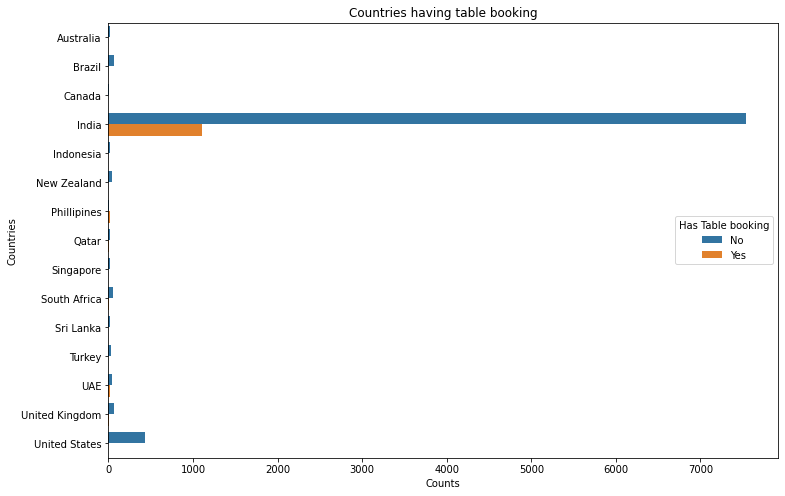

In [32]:
sns.barplot(x='Counts', y='Country', hue='Has Table booking', data=table_booking)
plt.title('Countries having table booking')
plt.xlabel('Counts')
plt.ylabel('Countries')
plt.show()

### Observation : Indian Restuarants has the maximum number of table bookings.

In [33]:
rating = final_df.groupby(['Has Online delivery','Is delivering now','Has Table booking','Aggregate rating']).size().reset_index().rename(columns={0:'Counts'})
rating

,Has Online delivery,Is delivering now,Has Table booking,Aggregate rating,Counts
0,No,No,No,0.0,2007
1,No,No,No,1.9,1
2,No,No,No,2.0,1
3,No,No,No,2.1,3
4,No,No,No,2.2,6
...,...,...,...,...,...
137,Yes,Yes,No,3.7,1
138,Yes,Yes,No,3.8,2
139,Yes,Yes,No,3.9,1
140,Yes,Yes,No,4.5,1


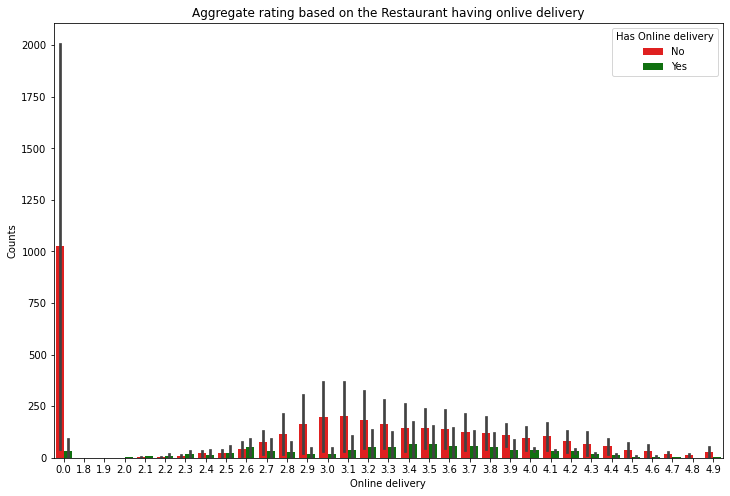

In [34]:
sns.barplot(x='Aggregate rating', y='Counts', hue='Has Online delivery', data=rating, palette=['red','green'])
plt.title('Aggregate rating based on the Restaurant having onlive delivery')
plt.ylabel('Counts')
plt.xlabel('Online delivery')
plt.show()

### Observation : More number of ratings are given for not having online delivery.

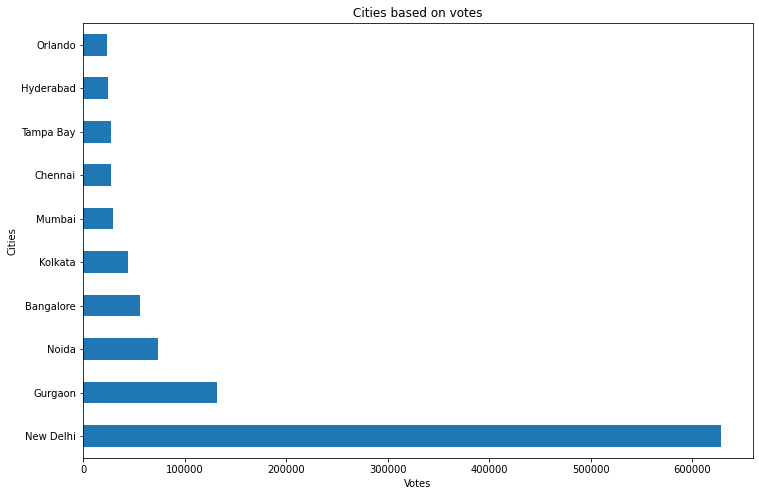

In [35]:
final_df.groupby('City')['Votes'].sum().sort_values(ascending=False).head(10).plot.barh()
plt.title('Cities based on votes')
plt.xlabel('Votes')
plt.ylabel('Cities')
plt.show()

### Observation : New Delhi city has the maximum number of votes from the top 10 cities.

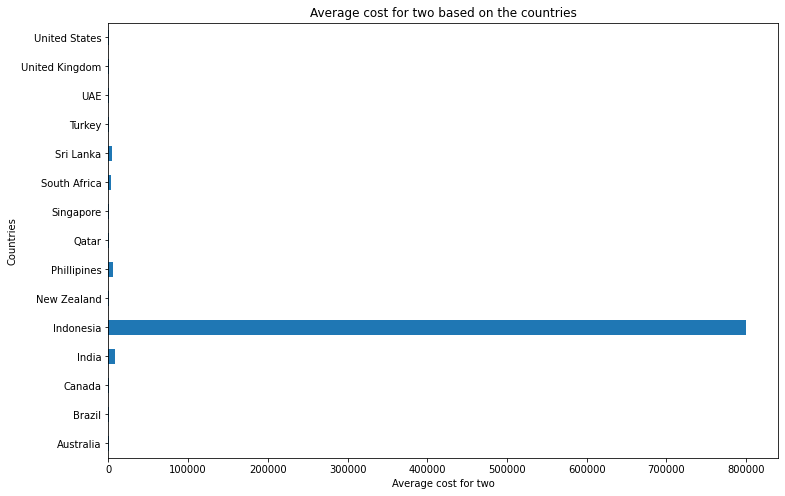

In [36]:
final_df.groupby(['Country'])['Average Cost for two'].max().plot.barh()
plt.title('Average cost for two based on the countries')
plt.xlabel('Average cost for two')
plt.ylabel('Countries')
plt.show()

### Observation : Indonesia has the highest Average cost for two among all the countries.

In [37]:
average_cost_cuisines = final_df.groupby(['Cuisines','Country'])['Average Cost for two'].max().sort_values(ascending=False).head(10).reset_index()
average_cost_cuisines

,Cuisines,Country,Average Cost for two
0,"Italian, Continental",Indonesia,800000
1,"Asian, Indonesian, Western",Indonesia,800000
2,"Sushi, Japanese",Indonesia,500000
3,Japanese,Indonesia,450000
4,"French, Western",Indonesia,350000
5,Indonesian,Indonesia,300000
6,"Cafe, Western",Indonesia,300000
7,"Peranakan, Indonesian",Indonesia,250000
8,"Western, Asian, Cafe",Indonesia,250000
9,"Japanese, Sushi, Ramen",Indonesia,200000


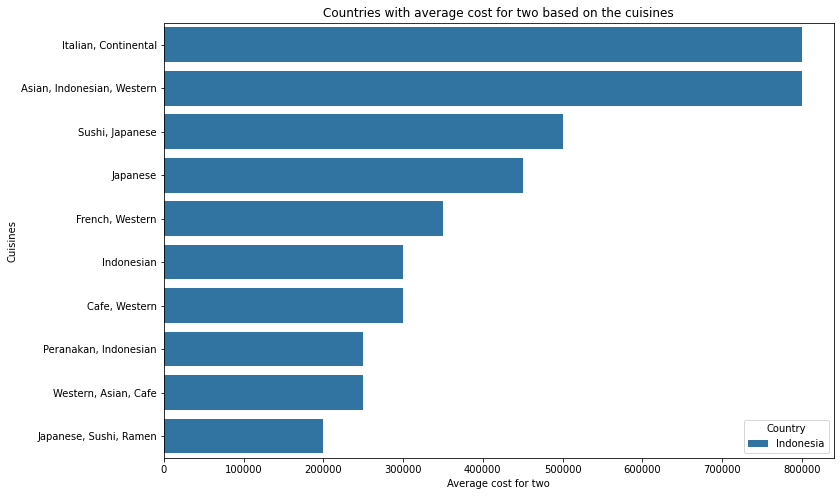

In [38]:
sns.barplot(x='Average Cost for two', y='Cuisines', hue='Country', data=average_cost_cuisines)
plt.title('Countries with average cost for two based on the cuisines')
plt.xlabel('Average cost for two')
plt.ylabel('Cuisines')
plt.show()

### Observation : Italian Continental and Asian Indonesian Western cuisines has the highest Average cost for two from the top 10 cuisines from Indonesia country.

In [39]:
continuous_feature = [feature for feature in final_df.columns if final_df[feature].dtype!='O']
continuous_feature

['Restaurant ID',
 'Country Code',
 'Longitude',
 'Latitude',
 'Average Cost for two',
 'Price range',
 'Aggregate rating',
 'Votes']

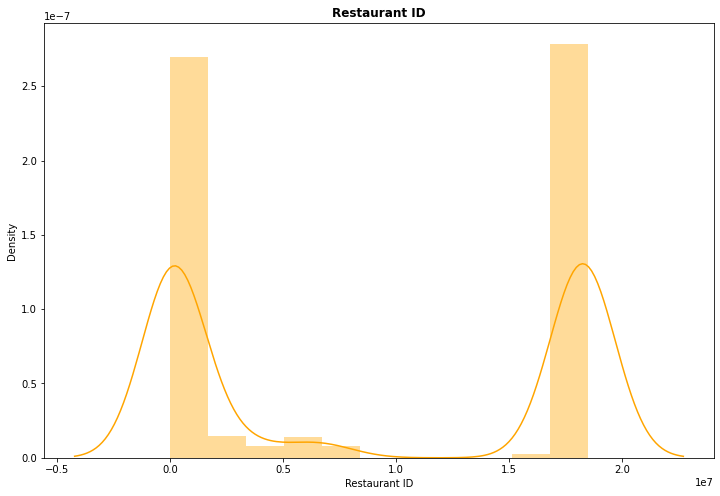

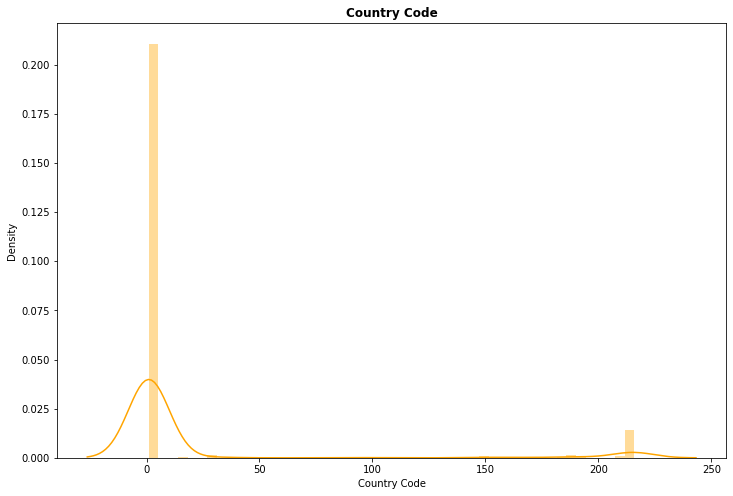

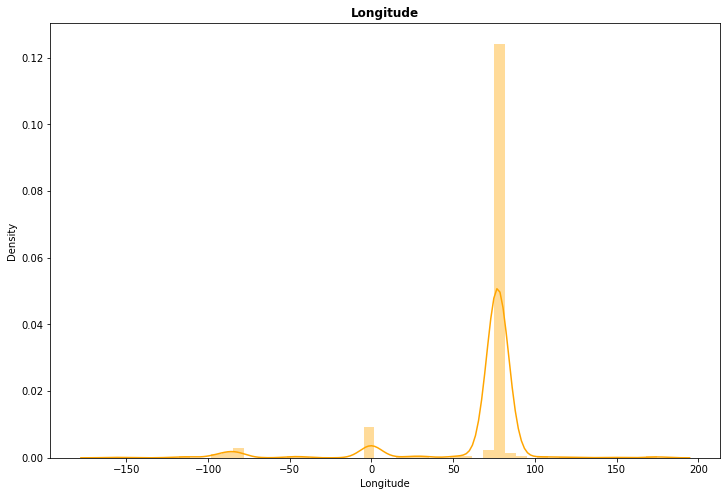

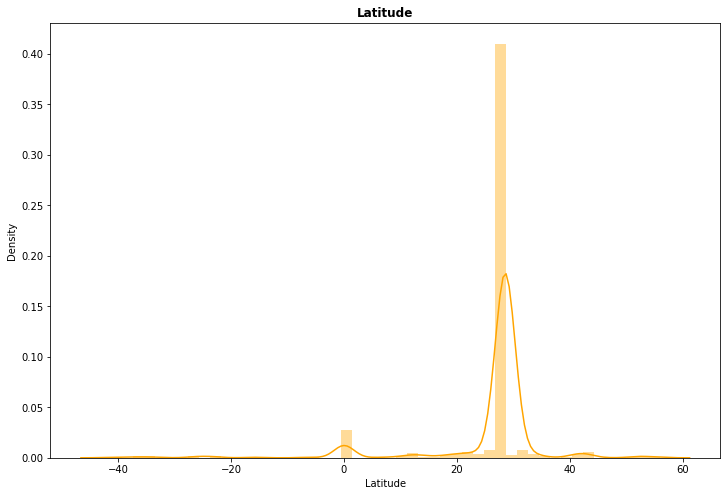

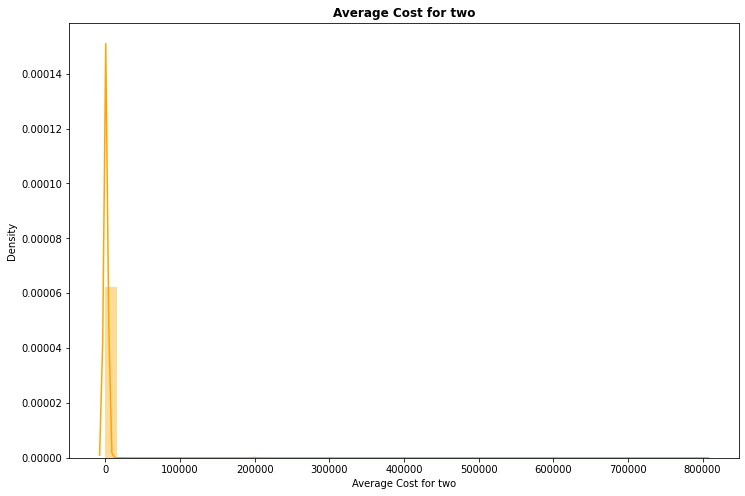

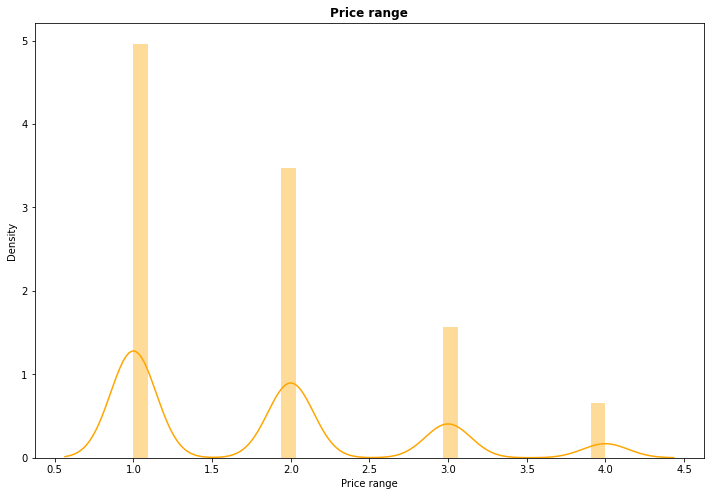

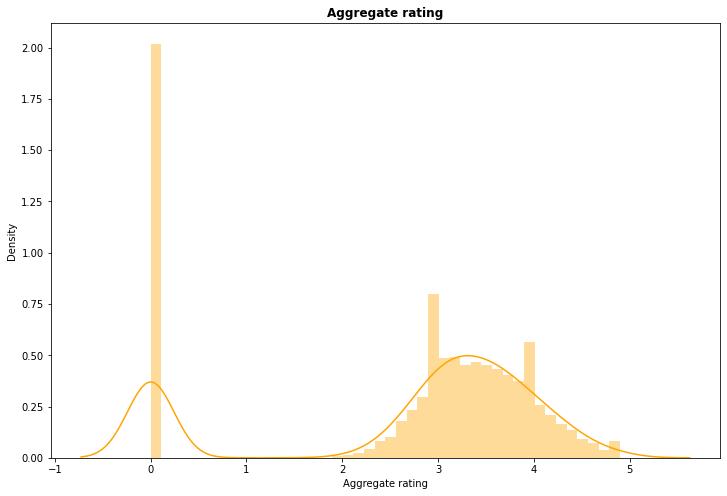

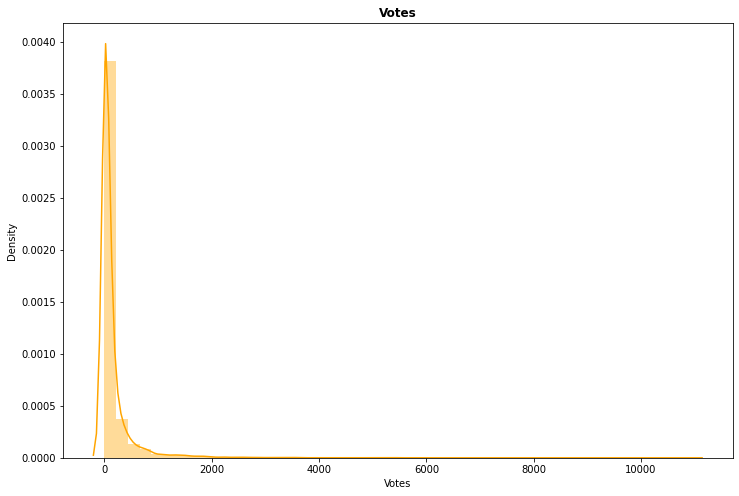

In [40]:
# Plotting the distribution plot for the continuous variables.
for feature in continuous_feature:
    sns.distplot(final_df[feature], color='orange')
    plt.title(feature, weight='bold')
    plt.show()

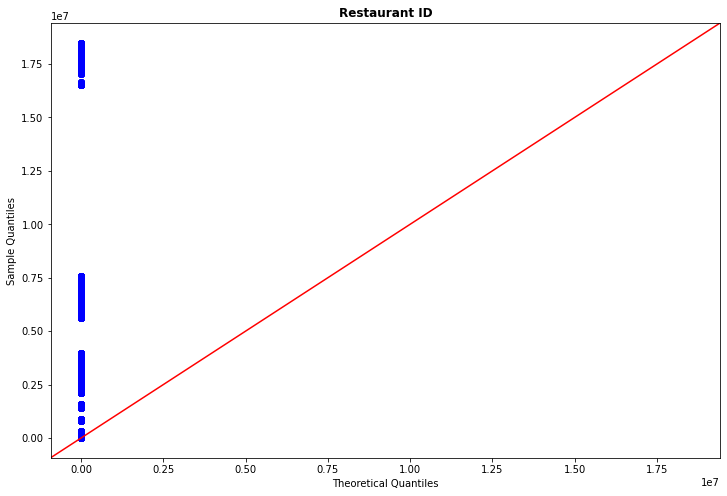

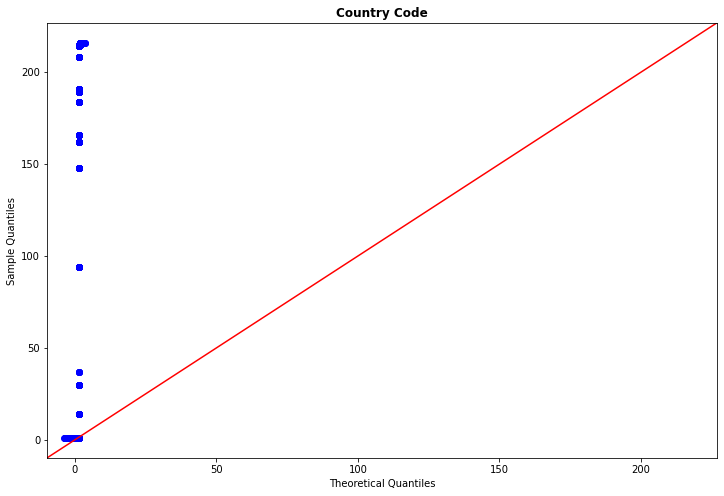

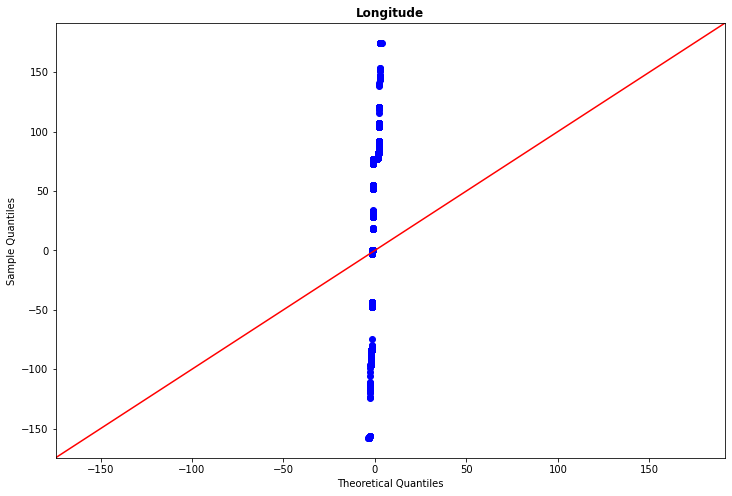

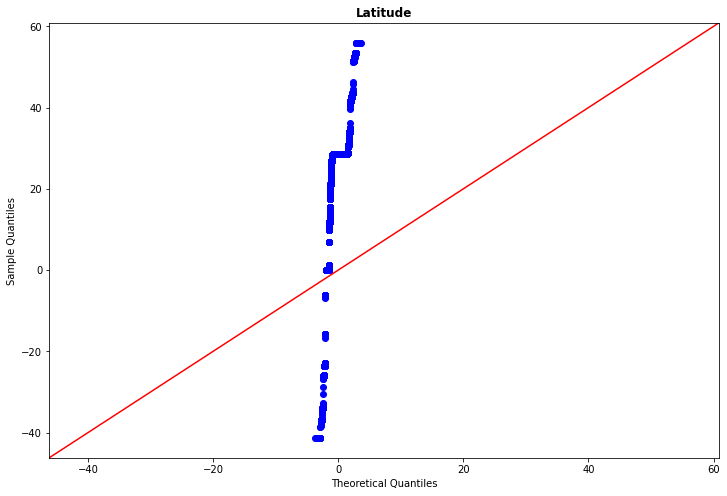

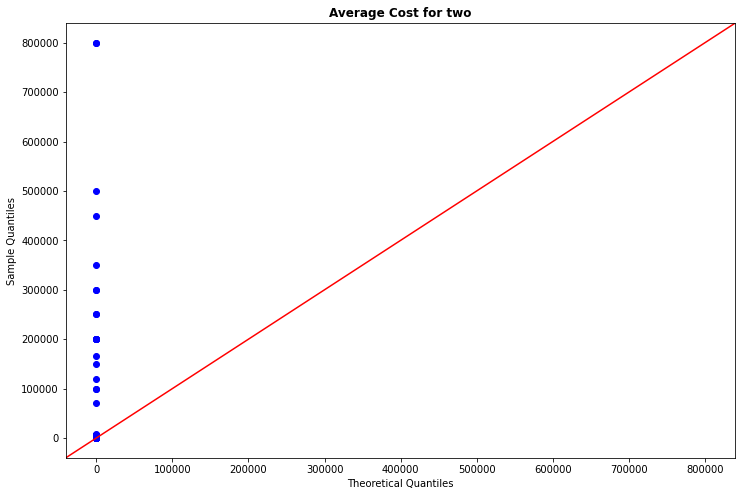

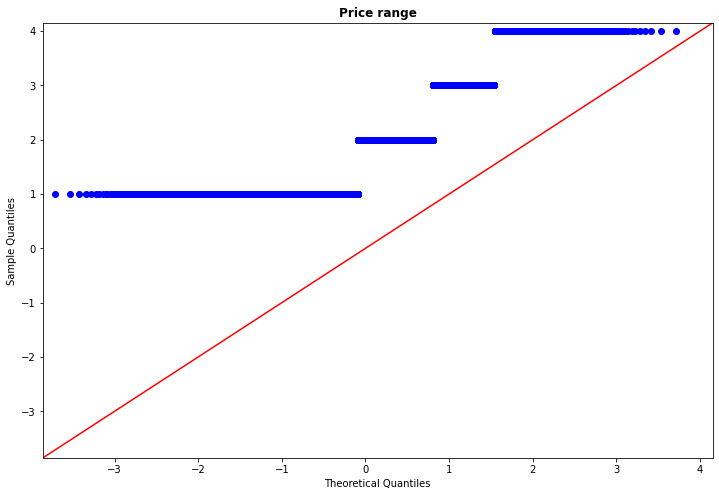

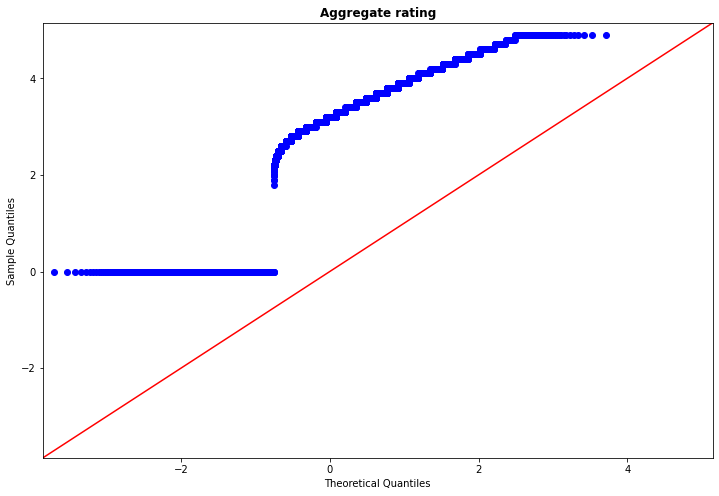

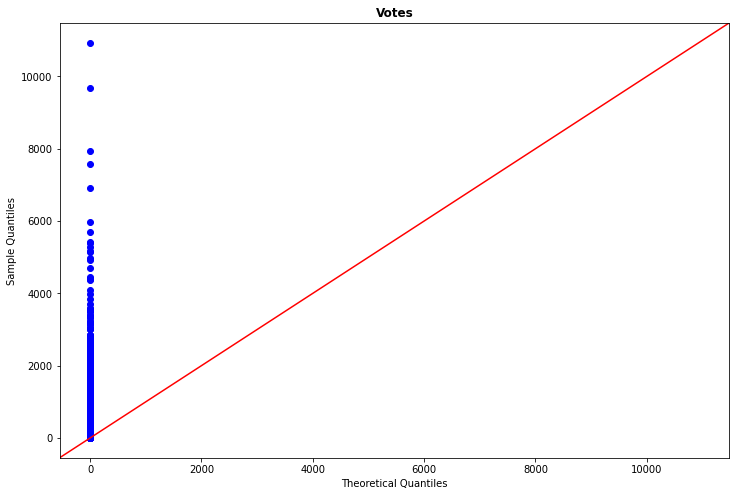

In [41]:
# Plotting QQ plot for all the continuous variables.
import statsmodels.api as sm
for feature in continuous_feature:
    sm.qqplot(data=final_df[feature], line='45')
    plt.title(feature, weight='bold')
    plt.show()

<AxesSubplot:>

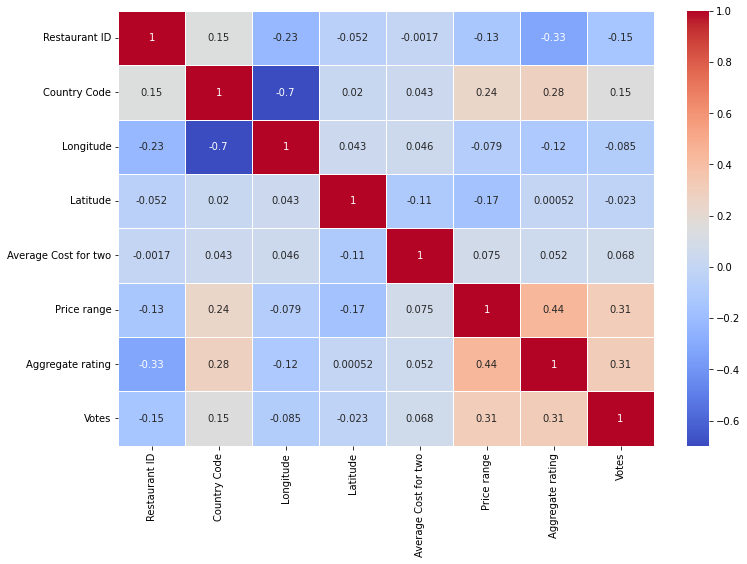

In [42]:
# Plotting heatmap.
sns.heatmap(final_df.corr(), annot=True, cmap='coolwarm', linewidth=0.5)

In [43]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [44]:
# Dropping the unwanted columns.
final_df.drop(['Restaurant ID','Restaurant Name','Country Code','Address','Longitude','Latitude','Switch to order menu','Locality Verbose'], axis=1, inplace=True)

In [45]:
final_df.columns

Index(['City', 'Locality', 'Cuisines', 'Average Cost for two', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [46]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  9551 non-null   object 
 1   Locality              9551 non-null   object 
 2   Cuisines              9551 non-null   object 
 3   Average Cost for two  9551 non-null   int64  
 4   Currency              9551 non-null   object 
 5   Has Table booking     9551 non-null   object 
 6   Has Online delivery   9551 non-null   object 
 7   Is delivering now     9551 non-null   object 
 8   Price range           9551 non-null   int64  
 9   Aggregate rating      9551 non-null   float64
 10  Rating color          9551 non-null   object 
 11  Rating text           9551 non-null   object 
 12  Votes                 9551 non-null   int64  
 13  Country               9551 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 1.1+ MB


# Feature Engineering.
#### Performing One-Hot Encoding with many features.

In [47]:
top_10 = [x for x in final_df['City'].value_counts().sort_values(ascending=False).head(10).index]
top_10

['New Delhi',
 'Gurgaon',
 'Noida',
 'Faridabad',
 'Ghaziabad',
 'Bhubaneshwar',
 'Guwahati',
 'Amritsar',
 'Ahmedabad',
 'Lucknow']

In [48]:
for label in top_10:
    final_df[label] = np.where(final_df['City']==label,1,0)

In [49]:
top_10 = [x for x in final_df['Cuisines'].value_counts().sort_values(ascending=False).head(10).index]
print(top_10)
for label in top_10:
    final_df[label] = np.where(final_df['Cuisines']==label,1,0)

['North Indian', 'North Indian, Chinese', 'Fast Food', 'Chinese', 'North Indian, Mughlai', 'Cafe', 'Bakery', 'North Indian, Mughlai, Chinese', 'Bakery, Desserts', 'Street Food']


In [50]:
top_10 = [x for x in final_df['Locality'].value_counts().sort_values(ascending=False).head(10).index]
print(top_10)
for label in top_10:
    final_df[label] = np.where(final_df['Locality']==label,1,0)

['Connaught Place', 'Rajouri Garden', 'Shahdara', 'Defence Colony', 'Pitampura', 'Malviya Nagar', 'Mayur Vihar Phase 1', 'Rajinder Nagar', 'Safdarjung', 'Satyaniketan']


In [51]:
final_df.drop(['Currency','Country'], axis=1, inplace=True)

#### Performing Ordinal Encoding for the features

In [52]:
final_df['Has Table booking'].value_counts()

No     8393
Yes    1158
Name: Has Table booking, dtype: int64

In [53]:
final_df['Has Table booking'] = final_df['Has Table booking'].map({'Yes':1, 'No':0})

In [54]:
final_df['Has Online delivery'].value_counts()

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

In [55]:
final_df['Has Online delivery'] = final_df['Has Online delivery'].map({'Yes':1, 'No':0})

In [56]:
final_df['Is delivering now'].value_counts()

No     9517
Yes      34
Name: Is delivering now, dtype: int64

In [57]:
final_df['Is delivering now'] = final_df['Is delivering now'].map({'Yes':1, 'No':0})

In [58]:
final_df['Rating color'] = final_df['Rating color'].map({'Dark Green':1,'Green':2,'Yellow':3,'Orange':4,'Red':5,'White':6})

In [59]:
final_df['Rating text'] = final_df['Rating text'].map({'Excellent':1,'Very Good':2,'Good':3,'Average':4,'Poor':5,'Not rated':6})

In [60]:
final_df.drop(['City','Locality','Cuisines'], axis=1, inplace=True)

In [61]:
final_df.columns

Index(['Average Cost for two', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Price range', 'Aggregate rating', 'Rating color',
       'Rating text', 'Votes', 'New Delhi', 'Gurgaon', 'Noida', 'Faridabad',
       'Ghaziabad', 'Bhubaneshwar', 'Guwahati', 'Amritsar', 'Ahmedabad',
       'Lucknow', 'North Indian', 'North Indian, Chinese', 'Fast Food',
       'Chinese', 'North Indian, Mughlai', 'Cafe', 'Bakery',
       'North Indian, Mughlai, Chinese', 'Bakery, Desserts', 'Street Food',
       'Connaught Place', 'Rajouri Garden', 'Shahdara', 'Defence Colony',
       'Pitampura', 'Malviya Nagar', 'Mayur Vihar Phase 1', 'Rajinder Nagar',
       'Safdarjung', 'Satyaniketan'],
      dtype='object')

In [62]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Average Cost for two            9551 non-null   int64  
 1   Has Table booking               9551 non-null   int64  
 2   Has Online delivery             9551 non-null   int64  
 3   Is delivering now               9551 non-null   int64  
 4   Price range                     9551 non-null   int64  
 5   Aggregate rating                9551 non-null   float64
 6   Rating color                    9551 non-null   int64  
 7   Rating text                     9551 non-null   int64  
 8   Votes                           9551 non-null   int64  
 9   New Delhi                       9551 non-null   int32  
 10  Gurgaon                         9551 non-null   int32  
 11  Noida                           9551 non-null   int32  
 12  Faridabad                       95

In [63]:
# Dividing the dataset into Dependent and Independent variables.
X = final_df.drop('Aggregate rating', axis=1)
y = final_df['Aggregate rating']

In [64]:
X.columns

Index(['Average Cost for two', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Price range', 'Rating color', 'Rating text',
       'Votes', 'New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Guwahati', 'Amritsar', 'Ahmedabad', 'Lucknow',
       'North Indian', 'North Indian, Chinese', 'Fast Food', 'Chinese',
       'North Indian, Mughlai', 'Cafe', 'Bakery',
       'North Indian, Mughlai, Chinese', 'Bakery, Desserts', 'Street Food',
       'Connaught Place', 'Rajouri Garden', 'Shahdara', 'Defence Colony',
       'Pitampura', 'Malviya Nagar', 'Mayur Vihar Phase 1', 'Rajinder Nagar',
       'Safdarjung', 'Satyaniketan'],
      dtype='object')

In [65]:
# Renaming the column names.
X.rename(columns=lambda x: x.lower().replace(',',''), inplace=True)

In [66]:
X.columns

Index(['average cost for two', 'has table booking', 'has online delivery',
       'is delivering now', 'price range', 'rating color', 'rating text',
       'votes', 'new delhi', 'gurgaon', 'noida', 'faridabad', 'ghaziabad',
       'bhubaneshwar', 'guwahati', 'amritsar', 'ahmedabad', 'lucknow',
       'north indian', 'north indian chinese', 'fast food', 'chinese',
       'north indian mughlai', 'cafe', 'bakery',
       'north indian mughlai chinese', 'bakery desserts', 'street food',
       'connaught place', 'rajouri garden', 'shahdara', 'defence colony',
       'pitampura', 'malviya nagar', 'mayur vihar phase 1', 'rajinder nagar',
       'safdarjung', 'satyaniketan'],
      dtype='object')

In [67]:
y

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9551, dtype: float64

# Feature Selection.

In [68]:
from sklearn.ensemble import ExtraTreesRegressor
feat = ExtraTreesRegressor()
feat.fit(X, y)

ExtraTreesRegressor()

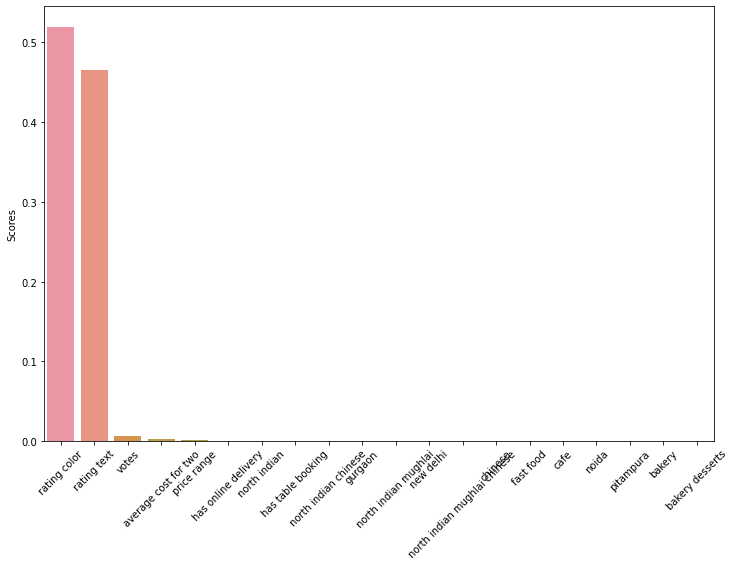

In [69]:
# computing the scores of the features using Extra tree regressor.
top_features = pd.DataFrame(feat.feature_importances_, index=X.columns, columns=['Scores'])
top20_features = top_features.nlargest(20, columns=['Scores'])
# Plotting the bar graph for the top 20 features.
sns.barplot(x=top20_features.index, y=top20_features['Scores'])
plt.xticks(rotation=45)
plt.show()

In [70]:
X = X[top20_features.index]
X.columns

Index(['rating color', 'rating text', 'votes', 'average cost for two',
       'price range', 'has online delivery', 'north indian',
       'has table booking', 'north indian chinese', 'gurgaon',
       'north indian mughlai', 'new delhi', 'north indian mughlai chinese',
       'chinese', 'fast food', 'cafe', 'noida', 'pitampura', 'bakery',
       'bakery desserts'],
      dtype='object')

In [71]:
# Rearranging the columns.
X = X[['rating text', 'rating color', 'votes', 'average cost for two','price range',
       'has online delivery', 'has table booking',  'pitampura', 'new delhi', 'gurgaon', 'noida', 
       'north indian', 'north indian chinese', 'north indian mughlai', 'north indian mughlai chinese',
       'chinese','fast food', 'cafe', 'bakery', 'bakery desserts']]

In [72]:
# Renaming the column names
X.rename(columns=lambda x: x.replace(' ','_'), inplace=True)

# Train Test Split.

In [73]:
# Splitting the dataset into trainning and testing data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

# Model Creation.

## Linear Regression.

In [74]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [75]:
# Traning the model with the training dataset.
lin_reg.fit(X_train,y_train)

LinearRegression()

In [76]:
lin_reg.score(X_train,y_train)

0.9066399361443023

In [77]:
y_predict = lin_reg.predict(X_test)

In [78]:
lin_reg.score(X_test,y_test)

0.9050919522509993

In [79]:
from sklearn.metrics import r2_score
lin_score = r2_score(y_test,y_predict)
print('Score of Linear Regression is {}'.format(lin_score))

Score of Linear Regression is 0.9050919522509993


# R2 Score for Linear Regression is 0.90

## Ridge Regression.

In [80]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
params = {'alpha':[1e-15,1e-13,1e-12, 1e-6,1e-3,1e-2,1,3,17,21,54,108]}
ridge_regressor = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=6)
# Traning the model with the training dataset.
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-12, 1e-06, 0.001, 0.01, 1,
                                   3, 17, 21, 54, 108]},
             scoring='neg_mean_squared_error')

In [81]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [82]:
ridge_score = r2_score(y_test, y_pred_ridge)
print('Score of Ridge Regression model is {}'.format(ridge_score))

Score of Ridge Regression model is 0.9050744669068901


# R2 Score for Rdige Regression is 0.90

In [83]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
params = {'alpha':[1e-15,1e-13,1e-12, 1e-6,1e-3,1e-2,1,3,17,21,54,36,47,31,7]}
lasso_regressor = GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=6)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-12, 1e-06, 0.001, 0.01, 1,
                                   3, 17, 21, 54, 36, 47, 31, 7]},
             scoring='neg_mean_squared_error')

In [84]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [85]:
lasso_score = r2_score(y_test, y_pred_lasso)
print('Score of Lasso Regression model is {}'.format(lasso_score))

Score of Lasso Regression model is 0.9050916128555642


# R2 Score for Lasso Regression is 0.90

In [86]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)

In [87]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [88]:
y_pred_rf = rf.predict(X_test)

In [89]:
rf_score = r2_score(y_test, y_pred_rf)
print('Score for Random Forest Regression is {}'.format(rf_score))

Score for Random Forest Regression is 0.9854600244784877


# R2 Score for Random Forest Regression is 0.98

In [90]:
X.columns

Index(['rating_text', 'rating_color', 'votes', 'average_cost_for_two',
       'price_range', 'has_online_delivery', 'has_table_booking', 'pitampura',
       'new_delhi', 'gurgaon', 'noida', 'north_indian', 'north_indian_chinese',
       'north_indian_mughlai', 'north_indian_mughlai_chinese', 'chinese',
       'fast_food', 'cafe', 'bakery', 'bakery_desserts'],
      dtype='object')

# Predicting or Evaluating the Model.

In [91]:
def predictRating(rating_text, rating_color, votes, average_cost_for_two, price_range, 
                  has_online_delivery, has_table_booking, locality, city, cuisines):
    predict = list()
    
    rating_text_mapped = {'Excellent':1,'Very Good':2,'Good':3,'Average':4,'Poor':5,'Not rated':6}
    predict.append(rating_text_mapped[rating_text])
    
    rating_color_mapped = {'Dark Green':1,'Green':2,'Yellow':3,'Orange':4,'Red':5,'White':6}
    predict.append(rating_color_mapped[rating_color])
    
    predict.append(np.array(votes).reshape(1, -1))
    
    predict.append(np.array(average_cost_for_two).reshape(1, -1))
    
    predict.append(np.array(price_range).reshape(1, -1))
    
    if 'Yes' in has_online_delivery:
        predict.append(1)
    else:
        predict.append(0)
    
    if 'Yes' in has_table_booking:
        predict.append(1)
    else:
        predict.append(0)
    
    if 'pitampura' in locality:
        predict.append(1)
    else:
        predict.append(0)
    
    city_columns = ['new_delhi', 'gurgaon', 'noida']
    temp = list(map(int, np.zeros(shape=(1, len(city_columns)))[0]))
    for index in range(0, len(city_columns)):
        if city_columns[index]==city:
            temp[index]=1
            break
    predict = predict+temp
    
    cuisines_columns = ['north indian', 'north indian chinese', 'north indian mughlai', 'north indian mughlai chinese',
       'chinese','fast food', 'cafe', 'bakery', 'bakery desserts']
    temp = list(map(int, np.zeros(shape=(1, 9))[0]))
    if 'north indian' in cuisines:
        temp[0] = 1
    if 'north indian chinese' in cuisines:
        temp[1] = 1
    if 'north indian mughlai' in cuisines:
        temp[2] = 1
    if 'north indian mughlai chinese' in cuisines:
        temp[3] = 1
    if 'chinese' in cuisines:
        temp[4] = 1
    if 'fast food' in cuisines:
        temp[5] = 1
    if 'cafe' in cuisines:
        temp[6] = 1
    if 'bakery' in cuisines:
        temp[7] = 1
    if 'bakery desserts' in cuisines:
        temp[8] = 1
    
    predict = predict + temp
    
    predict = np.array([predict])
    
    return rf.predict(predict)[0]

In [92]:
# Prediction 1
# rating_text, rating_color, votes, average_cost_for_two, price_range, 
# has_online_delivery, has_table_booking, locality, city, cuisines
rating = predictRating('Good', 'Red', 3295, 2300, 3, 'Yes', 'No', 'Bangalore', 'new_delhi', 'north indian chinese')
print('Ratings for the Restaurant is {:.1f}'.format(rating))

Ratings for the Restaurant is 3.2


In [93]:
# Prediction 2
# rating_text, rating_color, votes, average_cost_for_two, price_range, 
# has_online_delivery, has_table_booking, locality, city, cuisines
rating = predictRating('Excellent', 'Dark Green', 347, 1650, 2, 'No', 'No', 'Chennai', 'noida', ['north indian chinese','fast food','north indian'])
print('Ratings for the Restaurant is {:.1f}'.format(rating))

Ratings for the Restaurant is 4.8


In [94]:
# Prediction 3
# rating_text, rating_color, votes, average_cost_for_two, price_range, 
# has_online_delivery, has_table_booking, locality, city, cuisines
rating = predictRating('Poor', 'Red', 48, 950, 2, 'No', 'No', 'Goa', 'new_delhi', ['north indian chinese','fast food','north indian','cafe','bakery'])
print('Ratings for the Restaurant is {:.1f}'.format(rating))

Ratings for the Restaurant is 2.3


In [95]:
# Prediction 4
# rating_text, rating_color, votes, average_cost_for_two, price_range, 
# has_online_delivery, has_table_booking, locality, city, cuisines
rating = predictRating('Not rated', 'Red', 132, 650, 2, 'No', 'No', 'Mumbai', 'gurgaon', ['fast food','cafe','bakery','bakery desserts'])
print('Ratings for the Restaurant is {:.1f}'.format(rating))

Ratings for the Restaurant is 1.6


In [96]:
# Prediction 5
# rating_text, rating_color, votes, average_cost_for_two, price_range, 
# has_online_delivery, has_table_booking, locality, city, cuisines
rating = predictRating('Excellent', 'Dark Green', 4368, 4960, 3, 'No', 'No', 'Mumbai', 'new_delhi', ['north indian', 'north indian chinese', 'north indian mughlai','chinese'])
print('Ratings for the Restaurant is {:.1f}'.format(rating))

Ratings for the Restaurant is 4.7
